# Convolution Neural Network avec Keras

In [ ]:
import os
import cv2 
#conda install -c conda-forge opencv   
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras

In [ ]:
pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.0 MB 3.5 MB/s eta 0:00:11
   - -------------------------------------- 1.3/39.0 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.8/39.0 MB 2.5 MB/s eta 0:00:15
   -- ------------------------------------- 2.6/39.0 MB 2.8 MB/s eta 0:00:14
   --- ------------------------------------ 3.1/39.0 MB 2.9 MB/s eta 0:00:13
   ---- ----------------------------------- 3.9/39.0 MB 2.9 MB/s eta 0:00:13
   ---- ----------------------------------- 4.5/39.0 MB 2.9 MB/s eta 0:00:12
   ----- ---------------------------------- 5.2/39.0 MB 3.0 MB/s eta 0:00:12
   ------ --------------------------------- 6.0/39.0 MB 3.1 MB/s eta 0:00:11
   ------ --------------------------------- 6.8/39.0 MB 3.1 MB/s eta 0:00:11
   ------- ---------

On importe les librairies nécessaires de Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta
from tensorflow.keras.utils import to_categorical

## Importation et préparation des données

Télécharger les données depuis :

https://box.ec-nantes.fr:443/index.php/s/2NxopNZS3FTRBcr

Adresse du dossier où sont entreposées les données:

In [ ]:
#data_path = "data_animals"
data_path = r"C:\Users\kassi\OneDrive\Desktop\Math app\APTSI 1\TPs\data_animals\data_animals"

La fonction `os.listdir()` permet de lister le contenu du dossier `data_animals` (un repertoire par classe).

In [ ]:
data_dir_list = os.listdir(data_path)
print(data_dir_list)
num_classes = len(data_dir_list) 
print(num_classes)

['cats', 'dogs', 'horses', 'Humans']
4


Toutes les images ne sont pas au même format (nb de pixels).
Le réseau CNN impose que toutes les données aient la même dimension. Il nous faudra  transformer les images pour qu'elles soient toutes au même format : 128x 128.

In [ ]:
img_rows=128
img_cols=128

Lorsque les images en entrée du réseau sont en couleur, on utilise 3 canaux(RGB).

Ici, pour simplifier, nous allons préalablement transformer les images en niveaux de gris et de ce fait nous n'utiliserons qu'un seul canal en entrée du réseau. 

In [ ]:
num_channel=1

> Compléter le script ci-dessous pour importer les images en niveaux de gris et sous la forme de tableaux 128x128, dans la liste img_data_list.
*  `my_img = cv2.imread("file")`  : lecture d'un fichier image
*  `cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)` : convertit le fichier image en niveaux de gris
*  `cv2.resize(input_img,(n,p))` : redimensionne l'image au format n x p 

In [ ]:
from sklearn import preprocessing

img_data_list=[]

for dataset in data_dir_list: # boucle sur les 4 repertoires
    img_list=os.listdir(data_path+'/'+ dataset)  # 

    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img_raw=  cv2.imread(data_path+'/'+ dataset + '/' + img)
        input_img_grey= cv2.cvtColor(input_img_raw, cv2.COLOR_BGR2GRAY)
        input_img_flatten=cv2.resize(input_img_grey,(128,128)).flatten()
        img_data_list.append(input_img_flatten)

        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')

img_data_scaled = preprocessing.scale(img_data)
print (img_data_scaled.shape)

print (np.mean(img_data_scaled))
print (np.std(img_data_scaled))

print (img_data_scaled.mean(axis=0))
print (img_data_scaled.std(axis=0))  

Loaded the images of dataset-cats

Loaded the images of dataset-dogs

Loaded the images of dataset-horses

Loaded the images of dataset-Humans



C:\Users\kassi\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\kassi\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


(808, 16384)
1.2761886e-08
1.0000001
[ 5.8866963e-08 -5.7686673e-08  2.0360002e-07 ... -3.1646525e-08
 -9.3537984e-08  1.7261740e-08]
[0.99999934 0.99999934 1.0000005  ... 0.99999946 0.9999998  1.0000005 ]


> Quelle la dimension du tableau `img_data` ?

In [ ]:
img_data.shape

(808, 16384)

De façon générale, la première couche du réseau de convolution  prend en entrée un objet de dimension 3 : hauteur, largeur, profondeur,  où la profondeur correspond aux nombres de canaux.

Avec Tensor Flow (ici en backend) la profondeur doit être donnée en dernière position.

Cette dimension est ici "factice"  car nos images sont en niveaux gris, elle est néanmoins nécessaire car attendue par les fonctions de Keras et Tensor Flow.

L'échantillon d'images doit finalement se présenter sous la forme d'un objet de dimension 4: (nombre d'échantillons, hauteur, largeur, profondeur)

Nous redimensionnons les données pour qu'elle se présente ainsi :

In [ ]:
img_data_reshape=img_data_scaled.reshape(img_data.shape[0],
                                        img_rows,img_cols,
                                        num_channel)
print (img_data_reshape.shape)

(808, 128, 128, 1)


La dimension d'une image en entrée du réseau est la suivante :

In [ ]:
input_shape=img_data_reshape[0].shape # (128, 128, 1)
input_shape

(128, 128, 1)

Nous indiquons maintenant les labels des images:

In [ ]:
num_of_samples = img_data_reshape.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:202]=0
labels[202:404]=1
labels[404:606]=2
labels[606:]=3

names = ['cats','dogs','horses','humans']

> Convertir les labels en "one-hot encoding"

In [ ]:
from tensorflow.keras.utils import to_categorical
labels_enc = to_categorical(labels)
labels_enc

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

> Séparer  aléatoirement les données en un échantillon d'apprentissage (80%) et un échantillon de test (20%). Assurez-vous que les données d'apprentissage prennent bien la forme d'un tableau de dimension 4.

In [ ]:
sample_train,sample_test,labels_train,labels_test = train_test_split(img_data_reshape,labels_enc,test_size=0.2)

## Définition de l'architecture du modèle

Nous définissons ci-dessous les deux premiers niveaux de convolution du réseau CNN.
Chacune de ces deux couches est définie comme suit :
+ 32 noyaux (filtres)
+ Pas (stride) = 1
+ Kernel size = (3,3)
+ padding = 'same' (i.e. 0 padding : bordures à 0)
+ activation : relu

> Créer un modèle séquentiel que vous nommerez `my_first_CNN` composé de 4 couches succesives (conv + relu + conv + relu).    
> Voir  [ici](https://keras.io/layers/convolutional/#conv2d) et  [ici](https://keras.io/examples/vision/mnist_convnet/) pour la synthaxe de la couche de convolution `Conv2D`.

In [ ]:
my_first_CNN = Sequential()
my_first_CNN.add(keras.Input(shape = (128, 128, 1)))
my_first_CNN.add(Conv2D(32, (3,3), strides = 1, padding= 'same', activation='relu'))
my_first_CNN.add(Conv2D(32, (3,3), strides = 1, padding= 'same', activation='relu'))

> Executez les codes ci-dessous et decrire les sorties obtenues

In [ ]:
print(my_first_CNN.layers[0].input.shape)
print(my_first_CNN.layers[1].input.shape)

(None, 128, 128, 1)
(None, 128, 128, 32)


(`batch_size`,`n_l`,`n_c`,`nb de canaux`)

Keras dimensionnera ensuite correctement les couches en fonction du `batch_size` choisi par l'utilisateur. 

> Passer `batch_size=16` en argument de `Conv2D` et vérifier que cela a bien été pris en compte dans les dimensions de la couche cachée de `my_first_CNN`.

> Executez les codes ci-dessous et decrire les sorties obtenues. Expliquer en particulier la dimension de la troisième couche en utilisant `get_weights`.

In [ ]:
my_first_CNN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,568 (37.38 KB)

 Trainable params: 9,568 (37.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
M =np.shape(my_first_CNN.layers[1].get_weights()[0])
M

(3, 3, 32, 32)

Multichannel convolution:
\begin{eqnarray} Z(i,j,l) &= & ( V \star K ) (i,j,l) \\
& =  & \sum_{u,v,w}   V (i+u, j+v,w ) w_{u,v,l,w} 
\end{eqnarray}
where 
+ $V$  and $Z$ have the same dimensions (multichannel).
+ $K(u,v,l,w) $ gives the connection strength between a unit in channel $l$ of the output and a unit in channel $w$ of the input, with an offset of  $u$ rows and $v$ columns between the output unit and the input unit.

Le nombre de poids à estimer vaut donc :

In [ ]:
weight = M[1]*M[1]*M[2]*M[3]
weight

9216

Le nombre de paramètres à estimer pour les termes de biais :

In [ ]:
biais = M[3]
biais

32

On a bien que pour la troisième couche 9248 = 

In [ ]:
weight+biais

9248

> Vérifier que les poids sont (déjà) initialisés aléatoirement alors que les biais sont initialisés à 0. 

> Construire maintenant l'architecture complète du réseau `my_first_CNN` :
+ Convolution à 32 filtres de taille (3,3), zero padding
+ Activation Relu
+ Convolution à 32 filtres de taille (3,3), zero padding
+ Activation Relu
+ Maxpooling2D (2,2) [documentation](https://keras.io/api/layers/pooling_layers/max_pooling2d/)
+ Dropout(0.5) [documentation](https://keras.io/api/layers/regularization_layers/dropout/)
+ Convolution à 64 filtres de taille (3,3), zero padding
+ Maxpooling2D (2,2) 
+ Dropout(0.5) 
+ Flatten  [documentation](https://keras.io/api/layers/reshaping_layers/flatten/)
+ Dense(64)
+ Activation Relu
+ Dropout(0.5)
+ Dense(4)
+ Softmax   
> 
> Afficher un résumé de l'architecture avec `my_first_CNN.summary` 

In [ ]:
my_first_CNN = Sequential()
my_first_CNN.add(keras.Input(shape = (128, 128, 1)))
my_first_CNN.add(Conv2D(32, (3,3), strides = 1, padding= 'same', activation='relu'))
my_first_CNN.add(Conv2D(32, (3,3), strides = 1, padding= 'same', activation='relu'))
my_first_CNN.add(MaxPooling2D())
my_first_CNN.add(Dropout(rate=0.5))
my_first_CNN.add(Conv2D(64, (3,3), strides = 1, padding= 'same', activation='relu'))
my_first_CNN.add(MaxPooling2D())
my_first_CNN.add(Dropout(rate=0.5))
my_first_CNN.add(Flatten())
my_first_CNN.add(Dense(64))
my_first_CNN.add(Activation('relu'))
my_first_CNN.add(Dropout(rate=0.5))
my_first_CNN.add(Dense(4, activation='softmax'))

In [ ]:
my_first_CNN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,222,692 (16.11 MB)

 Trainable params: 4,222,692 (16.11 MB)

 Non-trainable params: 0 (0.00 B)

## Apprentissage du CNN

> Ajuster le modèle 
- avec la méthode sgd (avec un taux d'apprentissage de 0.01 et momentum de 0.9)
- puis la méthode adam.
> Tracer en fonction du nombre d'epochs le risque de cross-entropy ainsi que la précision pour les échantillons d'apprentissage et de validation.

In [ ]:
from tensorflow.keras.optimizers import *

sgd = SGD(learning_rate=0.01, momentum=0.9)

my_first_CNN.compile(optimizer=sgd,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_sgd = my_first_CNN.fit(sample_train, labels_train, batch_size=16, epochs=30)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - accuracy: 0.9489 - loss: 0.1268
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 280ms/step - accuracy: 0.9241 - loss: 0.2139
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.8916 - loss: 0.3257
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 311ms/step - accuracy: 0.9536 - loss: 0.1476
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 292ms/step - accuracy: 0.9474 - loss: 0.1707
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 284ms/step - accuracy: 0.9551 - loss: 0.1158
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 291ms/step - accuracy: 0.9613 - loss: 0.1086
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 287ms/step - accuracy: 0.9520 - loss: 0.1363
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 307ms/step - accuracy: 0.9551 - loss: 0.1362
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 0.9489 - loss: 0.2131
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.9412 - loss: 0.1664
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 11

In [ ]:
pred_sgd = my_first_CNN.predict(sample_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step


<Figure size 1200x500 with 0 Axes>

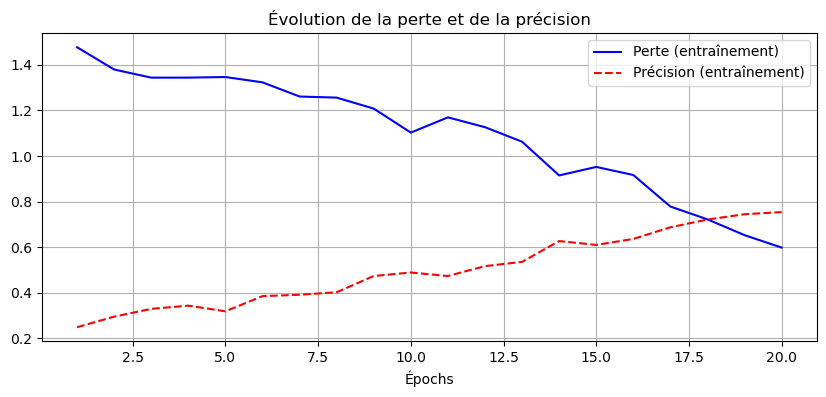

In [ ]:
train_loss = history_sgd.history['loss']
train_acc = history_sgd.history['accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12,5))

train_loss = history_sgd.history['loss']
train_acc = history_sgd.history['accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10,4))
plt.plot(epochs, train_loss, 'b-', label='Perte (entraînement)')
plt.plot(epochs, train_acc, 'r--', label='Précision (entraînement)')
plt.title("Évolution de la perte et de la précision")
plt.xlabel("Épochs")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.optimizers import Adam

my_first_CNN.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'] )


history_adam = my_first_CNN.fit(sample_train, labels_train, batch_size=16, epochs=20)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 28s 505ms/step - accuracy: 0.7461 - loss: 0.6575
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 500ms/step - accuracy: 0.8297 - loss: 0.4589
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 505ms/step - accuracy: 0.8529 - loss: 0.4156
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 502ms/step - accuracy: 0.8576 - loss: 0.3673
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 494ms/step - accuracy: 0.8870 - loss: 0.3065
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 530ms/step - accuracy: 0.8947 - loss: 0.2846
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 523ms/step - accuracy: 0.9195 - loss: 0.2611
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 501ms/step - accuracy: 0.9102 - loss: 0.2403
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 471ms/step - accuracy: 0.8978 - loss: 0.2673
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 489ms/step - accuracy: 0.9102 - loss: 0.2691
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 483ms/step - accuracy: 0.9319 - loss: 0.1985
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 24

In [ ]:
pred_adam =my_first_CNN.predict(sample_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


<Figure size 1200x500 with 0 Axes>

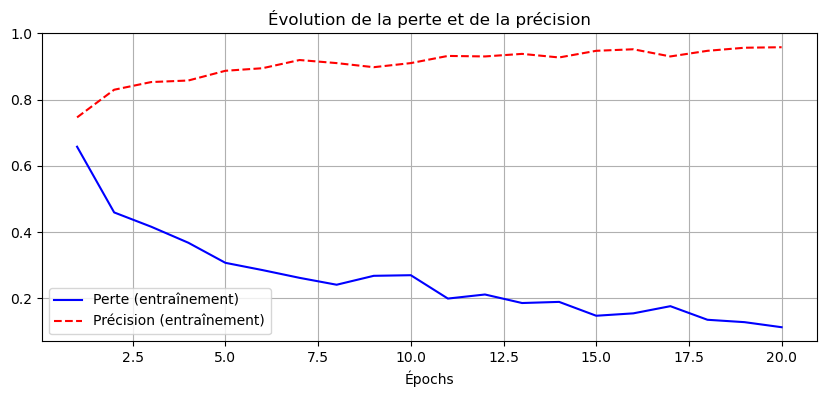

In [ ]:
train_loss = history_adam.history['loss']
train_acc = history_adam.history['accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12,5))

train_loss = history_adam.history['loss']
train_acc = history_adam.history['accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10,4))
plt.plot(epochs, train_loss, 'b-', label='Perte (entraînement)')
plt.plot(epochs, train_acc, 'r--', label='Précision (entraînement)')
plt.title("Évolution de la perte et de la précision")
plt.xlabel("Épochs")
plt.legend()
plt.grid(True)
plt.show()


> Donner le risque de cross-entropy ainsi que la précision pour l'échantillon de test.

In [ ]:
my_first_CNN.evaluate(sample_test, labels_test, verbose=0)

[1.8040934801101685, 0.5308641791343689]

## Matrice de confusion

> Utilisez les outils `classification_report()` et `confusion_matrix()` de `sklearn.metrics` pour décrire les performances du réseau de neurones.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

> Afficher la matrice de confusion à l'aide de la fonction `ConfusionMatrixDisplay`

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

In [ ]:
true_classes = np.argmax(labels_test, axis=1)
true_classes

array([2, 2, 1, 2, 3, 1, 3, 3, 3, 0, 1, 2, 0, 3, 0, 3, 3, 2, 2, 3, 2, 2,
       0, 2, 0, 1, 3, 1, 2, 0, 1, 3, 0, 2, 2, 1, 3, 1, 0, 2, 0, 1, 1, 0,
       1, 0, 2, 2, 2, 3, 2, 2, 1, 1, 0, 2, 0, 1, 3, 3, 2, 2, 2, 3, 2, 3,
       1, 2, 1, 0, 2, 0, 1, 0, 2, 3, 3, 3, 1, 2, 0, 1, 1, 1, 3, 1, 2, 3,
       1, 3, 3, 2, 2, 0, 3, 1, 3, 0, 1, 0, 1, 1, 2, 2, 3, 1, 3, 0, 2, 3,
       1, 1, 1, 0, 0, 0, 0, 3, 0, 0, 2, 2, 1, 2, 3, 3, 1, 1, 2, 2, 0, 0,
       3, 3, 3, 0, 2, 3, 2, 1, 1, 0, 3, 2, 0, 3, 3, 0, 1, 1, 0, 1, 3, 2,
       1, 3, 1, 2, 3, 3, 1, 0])

In [ ]:
pred_classes = np.argmax(pred_sgd, axis=1)
pred_classes

array([0, 1, 0, 2, 3, 2, 3, 3, 3, 2, 2, 1, 0, 1, 0, 0, 3, 2, 1, 3, 2, 2,
       1, 2, 0, 2, 0, 0, 2, 2, 0, 3, 0, 0, 3, 0, 2, 0, 0, 0, 3, 3, 3, 0,
       0, 0, 2, 2, 2, 3, 2, 2, 1, 0, 0, 2, 0, 2, 1, 3, 3, 2, 3, 3, 2, 3,
       3, 3, 3, 1, 2, 0, 2, 1, 3, 3, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 3,
       1, 1, 3, 1, 2, 0, 0, 2, 3, 1, 3, 0, 2, 3, 3, 0, 3, 3, 3, 0, 2, 3,
       1, 1, 0, 1, 1, 2, 0, 2, 3, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0,
       3, 3, 3, 0, 2, 3, 2, 2, 2, 0, 3, 3, 1, 3, 3, 0, 0, 1, 0, 3, 3, 3,
       1, 3, 0, 3, 2, 3, 2, 1])

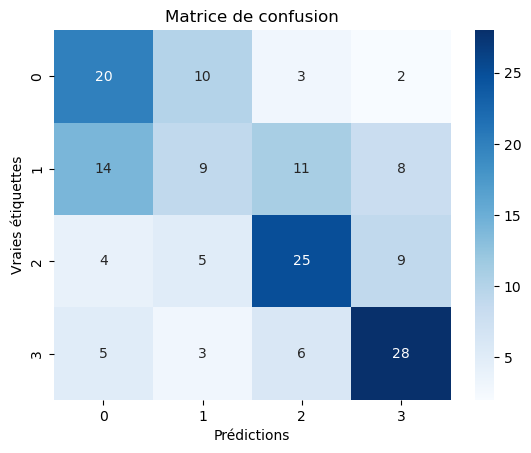

In [ ]:
# Matrice de confusion
cm = confusion_matrix(true_classes, pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
pred_adam

array([[5.86768351e-02, 1.55290693e-01, 7.36152768e-01, 4.98797372e-02],
       [8.93172562e-01, 1.14664892e-02, 1.05128698e-02, 8.48480538e-02],
       [7.30072737e-01, 2.71232780e-02, 2.25013047e-01, 1.77909695e-02],
       [3.40370639e-06, 4.31125256e-04, 9.82258081e-01, 1.73073132e-02],
       [6.67892098e-02, 2.63998359e-02, 2.05549318e-02, 8.86255980e-01],
       [1.20955333e-02, 2.88613856e-01, 2.95530528e-01, 4.03760076e-01],
       [1.89139476e-14, 4.84946625e-08, 9.99466121e-01, 5.33792947e-04],
       [2.60719779e-09, 3.48806293e-06, 9.90350327e-06, 9.99986649e-01],
       [1.11545362e-02, 1.52092293e-01, 1.09622274e-02, 8.25790942e-01],
       [7.33369961e-02, 3.02590758e-01, 5.27801692e-01, 9.62705910e-02],
       [1.91498790e-02, 2.74959534e-01, 6.99521959e-01, 6.36862079e-03],
       [1.33853763e-01, 7.56523252e-01, 9.82886553e-02, 1.13344155e-02],
       [5.44193029e-01, 2.77760446e-01, 1.37647957e-01, 4.03986238e-02],
       [1.53322271e-05, 9.99976635e-01, 4.70284886e

In [ ]:
pred_classes_adam = np.argmax(pred_adam, axis=1)
pred_classes_adam

array([2, 0, 0, 2, 3, 3, 2, 3, 3, 2, 2, 1, 0, 1, 0, 0, 3, 2, 2, 0, 2, 2,
       1, 2, 1, 2, 0, 0, 2, 2, 0, 3, 0, 0, 2, 1, 3, 1, 0, 0, 3, 3, 2, 1,
       0, 0, 2, 2, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 1,
       0, 3, 1, 1, 2, 0, 2, 1, 3, 3, 0, 2, 1, 2, 0, 0, 1, 3, 2, 1, 2, 3,
       1, 1, 3, 2, 2, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3, 0, 2, 3, 3, 1, 2, 3,
       0, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 3, 2, 1, 3, 1, 1, 2, 2, 1, 0,
       2, 3, 2, 2, 2, 3, 2, 2, 1, 1, 3, 1, 0, 3, 3, 1, 1, 1, 0, 1, 3, 3,
       1, 3, 3, 2, 2, 3, 1, 1])

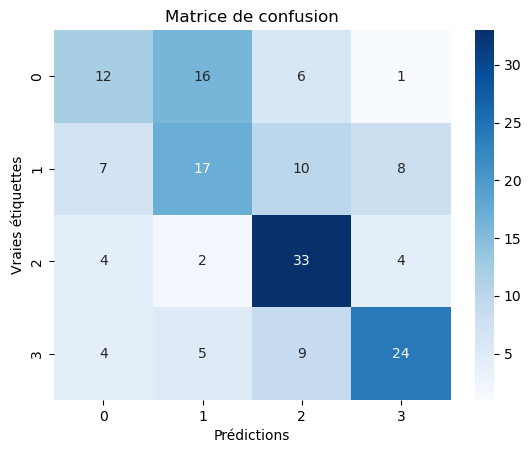

In [ ]:
cm = confusion_matrix(true_classes, pred_classes_adam)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

## Sauvegarde d'un réseau de neurones avec Keras

Lorsqu'un modèle a été ajusté, on peut vouloir conserver 
- l'architecture du réseau
- la valeurs des poids des couches
- l'optimiseur utilisé pour ajuster les poids 
- les métriques et les pertes considérées 

Pour répondre aux questions ci-dessous, vous pourrez consulter cette [page](https://keras.io/guides/serialization_and_saving/) de la documentation qui présente en détail les méthodes pour sauvegarder des réseaux Keras.

##### Sauvegarde du modèle (architecture seule) en json

Dans certaines situations, on ne souhaite sauvegarder que l'architecture. Par exemple si on veut comparer plusieurs méthodes d'optimisation des poids d'un même réseau. Il est possible de sauvegarder l'architecture d'un réseau au format JSON.

JavaScript Object Notation (JSON) est un format de données textuelles dérivé de la notation des objets du langage JavaScript. Il permet de représenter de l’information structurée.

Un document JSON a pour fonction de représenter de l'information accompagnée d'étiquettes permettant d'en interpréter les divers éléments, sans aucune restriction sur le nombre de celles-ci.

Un document JSON ne comprend que deux types d'éléments structurels :
+ Des ensembles de paires "nom" (alias "clé") / "valeur" ;
+ Des listes ordonnées de valeurs.

> Sauver l'architecture du réseau au format json.   
> Afficher le contenu du fichier sauvé.   
> Quelle est la taille du fichier json sur votre disque ?

In [ ]:
from tensorflow.keras.models import Sequential
import json
import os

# Chemin du fichier JSON
folder_path = r'C:\Users\kassi\OneDrive\Desktop\Math app\APTSI 1\TPs\to'
os.makedirs(folder_path, exist_ok=True)
json_path = os.path.join(folder_path, 'model_architecture.json')

# Convertir l'architecture du modèle en JSON
model_json = my_first_CNN.to_json()

# Sauvegarder dans un fichier
with open(json_path, 'w') as json_file:
    json_file.write(model_json)

print(f"Architecture du modèle sauvegardée dans : {json_path}")

Architecture du modèle sauvegardée dans : C:\Users\kassi\OneDrive\Desktop\Math app\APTSI 1\TPs\to\model_architecture.json


In [ ]:
from tensorflow.keras.models import model_from_json

# Charger le JSON (si ce n'est pas déjà en mémoire)
with open(json_path, 'r') as json_file:
    model_json_str = json_file.read()

# Recréer le modèle
reconstructed_model = model_from_json(model_json_str)

reconstructed_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,668,078 (48.32 MB)

 Trainable params: 4,222,692 (16.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,445,386 (32.22 MB)

##### Sauvegarde et chargement du modèle complet entrainé

> Utiliser les fonctions `model.save()` et `load_model()` pour sauver et charger un modèle complet (architecture, poids, optimiseur, métriques). Quelle est la taille du répertoire créé pour cette sauvegarde ?

In [ ]:
#create a file
folder_path = r'C:\Users\kassi\OneDrive\Desktop\Math app\APTSI 1\TPs\to1'
os.makedirs(folder_path, exist_ok=True)

# Full file path
save_path = os.path.join(folder_path, 'location.keras')

# Save the model as a proper .keras file
my_first_CNN.save(save_path)

# Load it back
myfcnn = load_model(save_path)
myfcnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,668,078 (48.32 MB)

 Trainable params: 4,222,692 (16.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,445,386 (32.22 MB)

> Comparer les poids du réseau reconstruit aux poids du réseau originel.

In [ ]:
# Boucle sur toutes les couches
for i, (orig_layer, recon_layer) in enumerate(zip(my_first_CNN.layers, reconstructed_model.layers)):
    orig_weights = orig_layer.get_weights()
    recon_weights = recon_layer.get_weights()
    
    # Vérifier si les poids sont identiques
    same = all([ (ow == rw).all() for ow, rw in zip(orig_weights, recon_weights)])
    
    print(f"Couche {i} ({orig_layer.name}) - poids identiques ? {same}")

Couche 0 (conv2d_7) - poids identiques ? False
Couche 1 (conv2d_8) - poids identiques ? False
Couche 2 (max_pooling2d_2) - poids identiques ? True
Couche 3 (dropout_3) - poids identiques ? True
Couche 4 (conv2d_9) - poids identiques ? False
Couche 5 (max_pooling2d_3) - poids identiques ? True
Couche 6 (dropout_4) - poids identiques ? True
Couche 7 (flatten_1) - poids identiques ? True
Couche 8 (dense_2) - poids identiques ? False
Couche 9 (activation_1) - poids identiques ? True
Couche 10 (dropout_5) - poids identiques ? True
Couche 11 (dense_3) - poids identiques ? False


> Vérifier que le modèle chargé peut être directement utilisé pour faire des prédictions ou pour calculer un score.

In [ ]:
reconstructed_model.compile(optimizer='adam',
                            loss='categorical_crossentropy',  # ou 'sparse_categorical_crossentropy' selon ton dataset
                            metrics=['accuracy'])
predictions = reconstructed_model.predict(sample_train)
score = reconstructed_model.evaluate(sample_test, labels_test, verbose=0)
print(f"Score du modèle sur les données de test : {score}")# score[0] est l'erreur et score[1] l'accuracy

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step 
Score du modèle sur les données de test : [1.392431378364563, 0.2530864179134369]


In [ ]:
score 

[1.392431378364563, 0.2530864179134369]

## Bonus : ajustement du modèle sur Google Colab

> Ajuster ce modèle CNN (ou évenuellement un modèle plus profond) sur [Google Colab](https://colab.research.google.com/notebooks) (ou sur [Binder](https://mybinder.org/)). 
> Il vous faudra telecharger les données sur Colab et adapter les codes du TP pour l'importation des images, plusieurs solutions sont possibles, voir par exemple
[ici](https://towardsdatascience.com/importing-data-to-google-colab-the-clean-way-5ceef9e9e3c8]).